<a href="https://colab.research.google.com/github/kundalemegha-max/A-B-testing-/blob/main/Regularization_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#Features in data set

#cylinders: contains the number of cylinders present in the car

#displacement: contains the Displacement of the car

#horsepower: contains the Horsepower of the car

#weight: contains the weight of the car

#acceleration: contains the Acceleration of the car

#model_year: contains the model year of the car

#origin: contains the origin country which car belong to

#car_name: contains the name of the car(Brand-Model-Variant)


#predict Miles per Gallon
#mpg: contains the fuel consumption value(in Miles per Gallon) for car

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv('/content/auto-mpg.csv')


In [48]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [49]:
df.shape

(398, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [51]:
df['horsepower'] = df['horsepower'].str.replace('?','NaN').astype(float)


In [52]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [53]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [54]:
# EDA
#=========
# shape
# column names
# head / tail
# describe
#info
# missing value identification
# outlier
# Split numerical and categorical col

# Visulaization -- dont include in the function

# feature Engineering
  # missing value imputation
  # oulier value impuatation
  # Encoding
    # -custom Encoding
    # - Onehot encoding
    # - Label encodoing


# Feature section
  # - Correlation
  # - Hypothesis testing

# Train test Split


# feature Transformation
  # - Normalization
  # - Standaridation

In [55]:
df['horsepower'] = df['horsepower'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [57]:
df.describe(include='O')

,car name
count,398
unique,305
top,ford pinto
freq,6


In [58]:
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(include=object).columns

<Axes: >

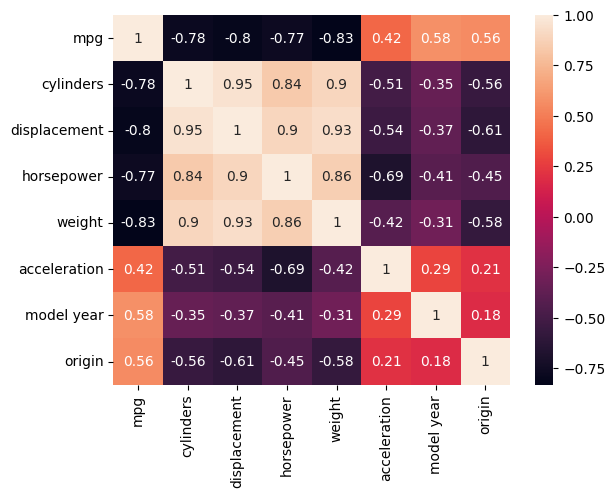

In [59]:
sns.heatmap(df[numerical_col].corr(),annot=True)


In [60]:
df['model year'].value_counts()

,count
model year,
73,40
78,36
76,34
82,31
75,30
80,29
79,29
81,29
70,29


In [61]:
column_list=df.columns

In [62]:
column_list

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [63]:
#df = pd.get_dummies(df,columns=['car name'],dtype='int')

In [64]:
column_list=df.columns

In [65]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [66]:
df.drop(columns=['car name'],axis=1, inplace= True)

In [67]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [68]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['mpg'],axis=1)
y=df['mpg']

x_train, x_test , y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
linear_model = LinearRegression()

linear_model.fit(x_train_scaled,y_train)
# train metrics
y_pred_train = linear_model.predict(x_train_scaled)
r2_score_train = r2_score(y_train,y_pred_train)
mean_absolute_error_train = mean_absolute_error(y_train,y_pred_train)
mean_squared_error_train = mean_squared_error(y_train,y_pred_train)

# test metrics
y_pred_test = linear_model.predict(x_test_scaled)
r2_score_test = r2_score(y_test,y_pred_test)
mean_absolute_error_test = mean_absolute_error(y_test,y_pred_test)
mean_squared_error_test = mean_squared_error(y_test,y_pred_test)

print(f"The R2 score of train data is {r2_score_train}")
print(f"The R2 score of test data is {r2_score_test}")
print(f"The MAE of train data is {mean_absolute_error_train}")
print(f"The MAE of test data is {mean_absolute_error_test}")
print(f"The MSE of train data is {mean_squared_error_train}")
print(f"The MSE of test data is {mean_squared_error_test}")


The R2 score of train data is 0.8140208416746618
The R2 score of test data is 0.847527962244272
The MAE of train data is 2.5988086229284404
The MAE of test data is 2.255456571751418
The MSE of train data is 11.66019068320613
The MSE of test data is 8.197879241441228


In [71]:
# find coofectint for each
# create eq. y=m1*x1 + m2*x2 -----> mpg = w1*cylindreical + w2*displacement + w3*horespower...

In [72]:
#find coefficient for each data point
beta = [linear_model.intercept_] + list(linear_model.coef_)
feature_names = x_train.columns.tolist()

print ("Intercept (w1):", beta[0])
for i in range(1, len(beta)):
  print(f"{feature_names[i-1]} coefficient:" , beta[i])

Intercept (w1): 23.60817610062894
cylinders coefficient: -0.2639424840877638
displacement coefficient: 1.4631489351802554
horsepower coefficient: -0.490514754488393
weight coefficient: -5.661161978954904
acceleration coefficient: 0.18902036543639172
model year coefficient: 2.8596305223758423
origin coefficient: 1.0725034374783042


In [81]:
# L1 (Lasso) Regularization
from sklearn. linear_model import Lasso, Ridge

In [82]:
lasso = Lasso(alpha=0.2)
lasso.fit(x_train_scaled,y_train)

Lasso(alpha=0.2)

In [86]:
lasso = Lasso(alpha=0.2)
lasso.fit(x_train_scaled,y_train)
# train metrics
y_pred_train = lasso.predict(x_train_scaled)
r2_score_train = r2_score(y_train,y_pred_train)
mean_absolute_error_train = mean_absolute_error(y_train,y_pred_train)
mean_squared_error_train = mean_squared_error(y_train,y_pred_train)

# test metrics
y_pred_test = lasso.predict(x_test_scaled)
r2_score_test = r2_score(y_test,y_pred_test)
mean_absolute_error_test = mean_absolute_error(y_test,y_pred_test)
mean_squared_error_test = mean_squared_error(y_test,y_pred_test)

print(f"The R2 score of train data is {r2_score_train}")
print(f"The R2 score of test data is {r2_score_test}")
print(f"The MAE of train data is {mean_absolute_error_train}")
print(f"The MAE of test data is {mean_absolute_error_test}")
print(f"The MSE of train data is {mean_squared_error_train}")
print(f"The MSE of test data is {mean_squared_error_test}")

The R2 score of train data is 0.8107169138687438
The R2 score of test data is 0.846179735086821
The MAE of train data is 2.577080120134219
The MAE of test data is 2.2372515742975083
The MSE of train data is 11.867334475916271
The MSE of test data is 8.270368621064538


In [87]:
lasso.coef_


array([-0.        , -0.        , -0.24646918, -4.85266702,  0.        ,
        2.66654862,  0.7735927 ])

In [88]:
for col in range (len(list(x_train.columns))):
  print(f"The column name is {x_train.columns[col]} and coeff is {lasso.coef_[col]}")

The column name is cylinders and coeff is -0.0
The column name is displacement and coeff is -0.0
The column name is horsepower and coeff is -0.2464691770763231
The column name is weight and coeff is -4.852667017670066
The column name is acceleration and coeff is 0.0
The column name is model year and coeff is 2.666548619971071
The column name is origin and coeff is 0.7735926977986632


In [89]:
list(x_train.columns)

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [90]:
x_train.columns[3]

'weight'

In [91]:
# Predicted new data
new_data = pd.DataFrame({"cylinders":[0],
                         "displacement":[0],
                         "horsepower":[200],
                         "weight":[3000],
                         "acceleration":[0],
                         "model year":[100],
                         "origin":[3]})
new_data_scled = scaler.transform(new_data)
lasso.predict(new_data_scled)



array([41.84138076])

In [92]:
ridge = Ridge(alpha=0.2)
ridge.fit(x_train_scaled,y_train)
# train metrics
y_pred_train = ridge.predict(x_train_scaled)
r2_score_train = r2_score(y_train,y_pred_train)
mean_absolute_error_train = mean_absolute_error(y_train,y_pred_train)
mean_squared_error_train = mean_squared_error(y_train,y_pred_train)

# test metrics
y_pred_test = ridge.predict(x_test_scaled)
r2_score_test = r2_score(y_test,y_pred_test)
mean_absolute_error_test = mean_absolute_error(y_test,y_pred_test)
mean_squared_error_test = mean_squared_error(y_test,y_pred_test)

print(f"The R2 score of train data is {r2_score_train}")
print(f"The R2 score of test data is {r2_score_test}")
print(f"The MAE of train data is {mean_absolute_error_train}")
print(f"The MAE of test data is {mean_absolute_error_test}")
print(f"The MSE of train data is {mean_squared_error_train}")
print(f"The MSE of test data is {mean_squared_error_test}")

The R2 score of train data is 0.8140177392094089
The R2 score of test data is 0.8474926727329085
The MAE of train data is 2.5979201619107166
The MAE of test data is 2.2546557732055286
The MSE of train data is 11.660385196057797
The MSE of test data is 8.199776632968916


In [93]:
for col in range (len(list(x_train.columns))):
   print(f"The column name is {x_train.columns[col]} and coeff is {ridge.coef_[col]}")

The column name is cylinders and coeff is -0.2568729369627449
The column name is displacement and coeff is 1.418366477073016
The column name is horsepower and coeff is -0.5003410960693512
The column name is weight and coeff is -5.619966772956985
The column name is acceleration and coeff is 0.1802338103993279
The column name is model year and coeff is 2.8548697568112154
The column name is origin and coeff is 1.0704787778569091


In [94]:
ridge.predict(new_data_scled)

array([40.07618614])